<a href="https://colab.research.google.com/github/mkkim007/AIFFEL/blob/main/%5BE_05%5DFaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [E-05] 나랑 닮은 연예인은 누구?

임베딩 : 고차원의 정보를 저차원으로 변환하면서 필요한 정보를 보전하는 것

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 8.2 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=681ec2d250091119e092973af6d8e2a21b5ab854cbe0f09030f22326e81319ec
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import dlib
import face_recognition
import os
%matplotlib inline


## 1.사진 모으기

구글 드라이브 마운트하기

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1.1 나의 사진..ㅎ

윈도우에서 한글파일명을 가진 파일을 zip으로 압축한 후에 리눅스에서 풀면 파일명이 깨지는 현상이 발생한다. 이는 zip파일은 유니코드로 저장하지 않'-O cp949'

In [4]:
!mkdir images

!unzip -qq -O cp949 /content/gdrive/MyDrive/Data/me.zip -d /content/images

### 1.2 연예인 사진

In [5]:
!tar Jxvf /content/gdrive/MyDrive/Data/celebrity.tar.xz
!cp -r /content/celebrity/* /content/images

celebrity/
celebrity/윤균상.jpg
celebrity/이종석.jpeg
celebrity/박해일.jpeg
celebrity/이승철.jpeg
celebrity/윤종신.jpeg
celebrity/송중기.jpeg
celebrity/이민호.jpeg
celebrity/김래원.jpeg
celebrity/정우성.jpeg
celebrity/이희준.jpg
celebrity/이성민.jpg
celebrity/류승범.jpg
celebrity/한석규.jpg
celebrity/박정민.jpg
celebrity/조정석.jpg
celebrity/이대형.jpg
celebrity/심수창.jpeg
celebrity/조인성.jpg
celebrity/이광수.jpg
celebrity/한기범.jpg
celebrity/하승진.jpg
celebrity/서장훈.jpg
celebrity/김희철.jpg
celebrity/김구라.jpg
celebrity/잇섭.png
celebrity/딕헌터.jpeg
celebrity/영알남.png
celebrity/김경진.png
celebrity/박휘순.jpg
celebrity/박희순.jpg
celebrity/택연.jpg
celebrity/하현우.jpg
celebrity/김연우.jpeg
celebrity/유희열.jpeg
celebrity/신동엽.jpg
celebrity/성시경.jpg
celebrity/마동석.jpeg
celebrity/조정치.jpg
celebrity/황정민.jpg
celebrity/곽도원.jpg
celebrity/박찬욱.jpeg
celebrity/봉준호.jpg
celebrity/유지태.jpg
celebrity/최민식.jpg
celebrity/박신양.png
celebrity/백윤식.png
celebrity/이경규.jpeg
celebrity/최양락.jpg
celebrity/박완규.png
celebrity/김종서.jpg
celebrity/이승환.jpg
celebrity/윤도현.png
celebrity/김C.jpeg
celebrity/이승기.jpeg
cel

file_list: ['도지한.jpg', '김종서.jpg', '이근대위.jpeg', '잭 갤리퍼내키스.jpg', '제이콥 배털론.jpg', '장원영.jpeg', '잇섭.png', '디오.jpeg', '마동석.jpeg', '우기.jpg', '시우민.jpg', '류현진.jpg', '러블리즈예인.jpg', '김희철.jpg', '유희열.jpeg', '켄 정.jpeg', '이민호.jpeg', '류승범.jpg', '유리.jpg', '봉준호.jpg', '이정재.jpeg', '최양락.jpg', '로제.jpg', '승희.jpeg', '이대형.jpg', '잭 니콜슨.jpeg', '티파니.jpg', '송중기.jpeg', '꽈두룹.jpeg', '슬기.jpg', '제니.jpg', '손호준.jpeg', '야마다 타카유키.jpeg', '이광수.jpg', '이안 굿펠로우.jpg', '류준열.jpg', '기성용.jpg', '오재원.jpg', '수호.jpg', '트와이스다현.jpeg', '티모시 달튼.jpeg', '공유.jpg', '장원준.jpeg', '박보영.jpg', '찬열.jpeg', '이재용.jpg', '전소미.jpg', '철면수심.jpg', '한효주.jpg', '김대명.jpeg', '한석규.jpg', '박나래.jpeg', '채연.jpg', '유해진.jpg', '이동국.jpeg', '대도서관.jpeg', 'RM.jpg', '효정.jpg', '크리스 햄스워스.jpg', '매드클라운.jpeg', '차범근.jpeg', '트와이스모모.jpeg', '도아.jpeg', '사쿠라.jpg', '김래원.jpeg', 'trump.jpg', '온앤오프라운.jpg', '이동휘.jpg', '다니엘 크레이그.jpeg', '케이.jpg', '여자아이들수진.jpeg', '차명석.jpg', '조승우.jpeg', '첸.jpg', '트와이스미나.jpg', '홍구.jpg', '증명사진.jpg', '김민재.jpeg', '이연걸.jpeg', '사무엘 L 잭슨.jpg', '산들.jpeg', '안재홍.jpg', '레오나르도 디

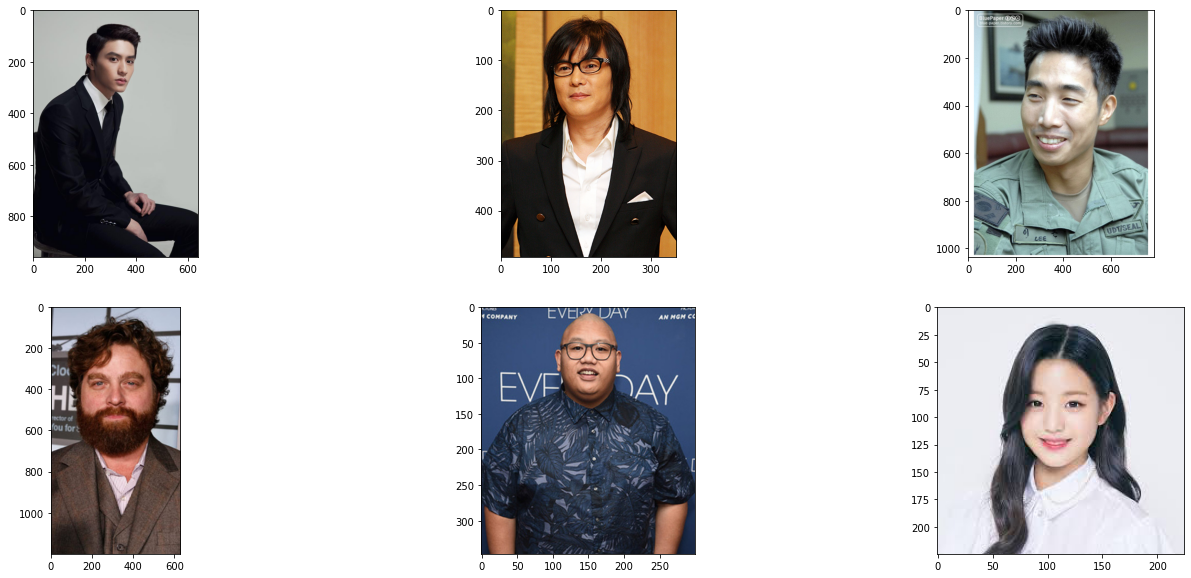

In [6]:
dir_path = "/content/images"
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 2.얼굴 영역 자르기

In [28]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image) # 이미지에서 얼굴 영역의 좌표
    if face_locations == [] : return []
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [8]:
image_path = dir_path+'/obama.jpg'
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
#pillow_image.save(path_to_save)

[(98, 758, 284, 572)]


In [ ]:
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save)

## 3.임베딩 추출하기

In [9]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding



[array([-0.08126254,  0.11014756, -0.01082434, -0.05268792,  0.01033733,
        -0.0081381 , -0.07251763, -0.09226447,  0.19304717, -0.09246377,
         0.23908521,  0.06770286, -0.2212313 , -0.14119361,  0.05562158,
         0.13705495, -0.17924419, -0.07232306, -0.1118328 , -0.11370808,
         0.03956439, -0.01019117,  0.09421782,  0.04493129, -0.12757553,
        -0.34449607, -0.05374933, -0.17703304,  0.00868219, -0.09721589,
        -0.09817185,  0.00278223, -0.17721349, -0.12789799,  0.0348983 ,
        -0.01991227, -0.00838926, -0.00132864,  0.18308598,  0.02447565,
        -0.12376569,  0.0995703 ,  0.02323568,  0.22983313,  0.28385246,
         0.06655722, -0.00558913, -0.09833538,  0.10058984, -0.23476952,
         0.06006299,  0.13415912,  0.08373027,  0.03900497,  0.10194538,
        -0.19337651,  0.01717631,  0.0897897 , -0.1600512 ,  0.01892103,
         0.03082441, -0.06051283, -0.04526768,  0.04633338,  0.20678683,
         0.10299791, -0.12437537, -0.0490515 ,  0.1

In [29]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        print(img_path)
        img_path = dir_path +'/' +file

        face = get_cropped_face(img_path)
        if face == []: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [30]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

/content/images/도지한.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/content/images/김종서.jpg
/content/images/이근대위.jpeg
/content/images/잭 갤리퍼내키스.jpg
/content/images/제이콥 배털론.jpg
/content/images/장원영.jpeg
/content/images/잇섭.png
/content/images/디오.jpeg
/content/images/마동석.jpeg
/content/images/우기.jpg
/content/images/시우민.jpg
/content/images/류현진.jpg
/content/images/러블리즈예인.jpg
/content/images/김희철.jpg
/content/images/유희열.jpeg
/content/images/켄 정.jpeg
/content/images/이민호.jpeg
/content/images/류승범.jpg
/content/images/유리.jpg
/content/images/봉준호.jpg
/content/images/이정재.jpeg
/content/images/최양락.jpg
/content/images/로제.jpg
/content/images/승희.jpeg
/content/images/이대형.jpg
/content/images/잭 니콜슨.jpeg
/content/images/티파니.jpg
/content/images/송중기.jpeg
/content/images/꽈두룹.jpeg
/content/images/슬기.jpg
/content/images/제니.jpg
/content/images/손호준.jpeg
/content/images/야마다 타카유키.jpeg
/content/images/이광수.jpg
/content/images/이안 굿펠로우.jpg
/content/images/류준열.jpg
/content/images/기성용.jpg
/content/images/오재원.jpg
/content/images/수호.jpg
/content/images/트와이스다현.jpeg
/content/images/티모시 달튼.jpeg
/co

array([-0.15962465,  0.20268653,  0.03236368,  0.02439236, -0.06226429,
        0.05140708,  0.07351795, -0.16823344,  0.06962213, -0.05557962,
        0.17270115, -0.05094168, -0.35293114, -0.03164374,  0.0379298 ,
        0.17343853, -0.13260117, -0.15357378, -0.23523533, -0.08442686,
       -0.00134148,  0.0321067 , -0.08926149, -0.0267079 , -0.09581175,
       -0.25792351, -0.01057006, -0.11071659,  0.03133575, -0.0744492 ,
        0.05670554, -0.02273792, -0.19461147, -0.04576051,  0.00947583,
        0.01806067, -0.15026242, -0.0778732 ,  0.17577612,  0.01933256,
       -0.19744582, -0.03930522,  0.07374461,  0.20196025,  0.14767551,
       -0.01415388,  0.01724749, -0.11976211,  0.0946297 , -0.24318154,
       -0.0275512 ,  0.12169901,  0.14837697,  0.17079787,  0.06952564,
       -0.15360463,  0.02005425,  0.08199155, -0.19544819,  0.10653647,
        0.11468481, -0.21902826, -0.07677589, -0.06791048,  0.105876  ,
        0.05921572, -0.061157  , -0.11171091,  0.23917486, -0.15

## 4.임베딩 사이 거리 측정

In [31]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.888511807112004

## 결과

In [33]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   

In [35]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

get_nearest_face('trump')

순위 1 : 이름(존 파브르), 거리(0.6801174335692237)
순위 2 : 이름(biden), 거리(0.6820617025472521)
순위 3 : 이름(clinton), 거리(0.6875851635733622)
순위 4 : 이름(톰 홀랜드), 거리(0.701060339427733)
순위 5 : 이름(케빈 스페이시), 거리(0.7156816889787245)


In [37]:
get_nearest_face('증명사진')

순위 1 : 이름(트와이스사나), 거리(0.3623612087092883)
순위 2 : 이름(지호), 거리(0.36799839034005505)
순위 3 : 이름(아이즈원조유리), 거리(0.3818021617806317)
순위 4 : 이름(사쿠라), 거리(0.38425738739055426)
순위 5 : 이름(비니), 거리(0.3846361441240461)
